## Training a Linear Regression and Random Forest model to predict the number of wins using the Moneyball dataset

## Context:
In the early 2000s, Billy Beane and Paul DePodesta worked for the Oakland Athletics. While there, they literally changed the game of baseball. This data set contains a set of variables that Beane and DePodesta focused heavily on.
They determined that stats like on-base percentage (OBP) and slugging percentage (SLG) were very important when it came to scoring runs, however they were largely undervalued by most scouts at the time. Since these players weren’t being looked at by other teams, they could recruit these players on a small budget.

## Brief Introduction

In 2002, Billy Beane, the manager of the Oakland Athletics (or the A's), was already having financial troubles, and on top of that, several of the team's best players decided to leave. The problem that Beane desperately needed to solve was how to compete with teams who had much more money. They needed better players for less money. Enter Paul DePodesta, a Harvard grad who used statistics to literally change the game. In this kernel, we will walk through the same path but using some advance algorithms to build a top class team using a low class budget.

## Objective:
The objective here is to predict the number of wins by a team for the year 2002 by analyzing the game stats for the years from 1962–2001.
Note: The number of wins recorded by the team in the year 2002 was 103. The idea is to replicate the data analysis done in the year 2001 with the latest ML models and check if we can get the prediction close to 103.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

## Reading the Dataset

In [2]:
df = pd.read_csv('baseball.csv')

In [3]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


## Extracting the data for the years 1962–2001

In [4]:
df = df[df.Year<2002].copy()

## Checking the Data Description and Percentage of Missing values in the dataset

In [5]:
desc = df.describe().T
desc['Missing %'] = (1-(desc['count']/len(df)))*100
desc

,count,mean,std,min,25%,50%,75%,max,Missing %
Year,902.0,1982.356984,11.556504,1962.000,1973.000,1983.0000,1992.00000,2001.000,0.000000
RS,902.0,703.809313,93.314579,463.000,641.250,695.0000,761.75000,1009.000,0.000000
RA,902.0,703.809313,93.784100,472.000,640.000,697.0000,763.00000,1103.000,0.000000
W,902.0,80.881375,11.403424,40.000,73.000,81.0000,89.00000,116.000,0.000000
OBP,902.0,0.324961,0.015391,0.277,0.314,0.3240,0.33500,0.373,0.000000
SLG,902.0,0.390412,0.033110,0.301,0.368,0.3880,0.41175,0.485,0.000000
BA,902.0,0.258153,0.013266,0.214,0.250,0.2580,0.26700,0.294,0.000000
Playoffs,902.0,0.170732,0.376483,0.000,0.000,0.0000,0.00000,1.000,0.000000
RankSeason,154.0,2.792208,1.557924,1.000,2.000,2.5000,4.00000,8.000,82.926829
RankPlayoffs,154.0,2.454545,1.016793,1.000,2.000,3.0000,3.00000,4.000,82.926829


## Excluding the categorical variables to impute the missing values by using KNNImputer

In [6]:
df2 = df.select_dtypes(include=['float64','int64'])
imp = KNNImputer(n_neighbors=1)
df2 = imp.fit_transform(df2)
df_final = pd.DataFrame(df2,columns=['Year','RS','RA','W','OBP','SLG','BA','Playoffs','RankSeason','RankPlayoffs','G','OOBP','OSLG'])
df_final.head()

,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,2001.0,691.0,730.0,75.0,0.327,0.405,0.261,0.0,4.0,3.0,162.0,0.331,0.412
1,2001.0,818.0,677.0,92.0,0.341,0.442,0.267,1.0,5.0,1.0,162.0,0.311,0.404
2,2001.0,729.0,643.0,88.0,0.324,0.412,0.260,1.0,7.0,3.0,162.0,0.314,0.384
3,2001.0,687.0,829.0,63.0,0.319,0.380,0.248,0.0,4.0,1.0,162.0,0.337,0.439
4,2001.0,772.0,745.0,82.0,0.334,0.439,0.266,0.0,3.0,2.0,161.0,0.329,0.393


## Checking for Correlation with the target variable

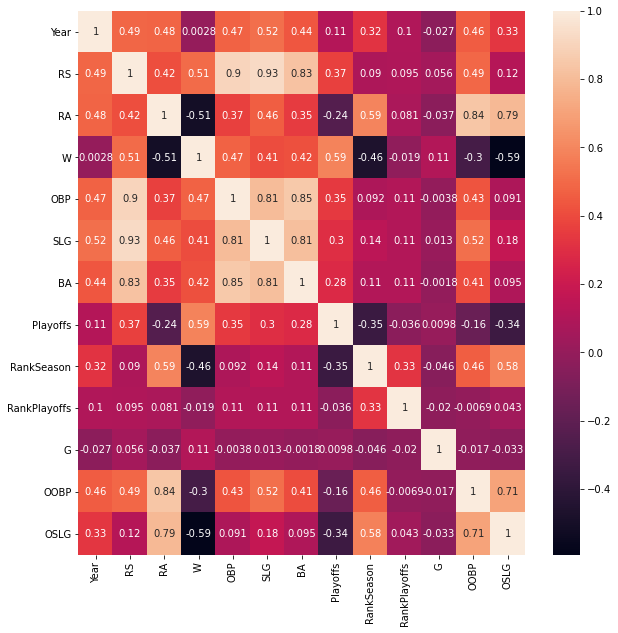

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_final.corr(),annot = True)
plt.show()

## Selecting the independent and dependent variables ( Including the 4 features used for analysis in the year 2001)

In [8]:
y = df_final.W
X = df_final[['OBP','SLG','OOBP','OSLG']]

Model Predictions

Here are the Oakland Athletics statistics in 2001 before the playoffs.

OBP: 0.339

SLG: 0.430

OOBP: 0.307

OSLG: 0.373

Creating test record with these values and then using models to generate predictions.

In [9]:
x_test = pd.DataFrame({'OBP':[0.339],'SLG':[0.430],'OOBP':[0.307],'OSLG':[0.373]})

## Linear Regression

In [10]:
lr = LinearRegression()
model = lr.fit(X,y)

In [11]:
model.predict(x_test)

array([103.66854532])

## The prediction for the Linear Regreesion is 103.66854532 (which is very close to the actual value (103).

## Random Forest

In [12]:
RF = RandomForestRegressor()

In [13]:
param={'n_estimators':np.arange(1,100),'max_depth':np.arange(1,10)}
GS=GridSearchCV(RF,param,cv=4,scoring='neg_mean_squared_error')
GS.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_mean_squared_error')

In [14]:
GS.best_params_

{'max_depth': 6, 'n_estimators': 98}

In [29]:
RF = RandomForestRegressor(n_estimators=98, max_depth=6)

In [30]:
RF.fit(X,y)

RandomForestRegressor(max_depth=6, n_estimators=98)

In [31]:
RF.predict(x_test)

array([101.82499633])

## AdaBoost

In [18]:
RF = RandomForestRegressor()

In [19]:
adaboost = AdaBoostRegressor(RF)
grid = GridSearchCV(adaboost,param_grid={'n_estimators':np.arange(1,30)},cv=5,scoring='neg_mean_squared_error')
model1 = grid.fit(X,y)

In [20]:
grid.best_params_

{'n_estimators': 25}

In [21]:
boost = AdaBoostRegressor(RF,n_estimators=4)
model2 = boost.fit(X,y)
model2.predict(x_test)

array([102.97])

## DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X, y) 

DecisionTreeRegressor(random_state=0)

In [24]:
regressor.predict(x_test) 

array([103.])

## KNN Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
knnreg = KNeighborsRegressor()

In [27]:
knnreg.fit(X,y)

KNeighborsRegressor()

In [28]:
knnreg.predict(x_test)

array([101.8])

## GradientBoost

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

In [34]:
gb = GradientBoostingRegressor()

In [35]:
gb.fit(X,y)

GradientBoostingRegressor()

In [36]:
gb.predict(x_test)

array([100.05182057])

In [37]:
grid_1 = GridSearchCV(gb,param_grid={'n_estimators':np.arange(1,30)},cv=5,scoring='neg_mean_squared_error')
model3 = grid_1.fit(X,y)

In [38]:
model3.best_params_

{'n_estimators': 28}

In [40]:
gb = GradientBoostingRegressor(n_estimators=28)
gb.fit(X,y)

GradientBoostingRegressor(n_estimators=28)

In [41]:
gb.predict(x_test)

array([98.36500307])

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [55]:
lr.predict(x_test)

array([83.])

## Wins predicted by each model